# Data Anlysis / Visualization of College Football Stadiums
### This data was gathered by scraping the data and storing it in a csv file

I want to look at many different things with this data:
- Number of teams in each conference
- Stadium capacity for each team
- Average stadium capacity for each conference
- Oldest and newest stadiums
- Stadium age for teams and conferences
- The stadium surfaces for conferences and ages

I also want to create a model to do predictions:
- Predict the stadium capacity based on the year built and the conference
- Predict the stadium capacity based on the year built and the surface

The columns of the data are:
- Team: The name of the team
- Conference: The conference the team is in
- Capacity: The capacity of the stadium
- Record1: The record attendance for the stadium
- Built: The year the stadium was built
- Expanded 2: The year the stadium was expanded (if applicable)
- Surface: The surface of the stadium

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [245]:
df = pd.read_csv('Division1FBSFootballStadiums.csv')
df.head()

,Stadium,City,State,Team,Conference,Capacity,Record1,Built,Expanded 2,Surface
0,Acrisure Stadium,Pittsburgh,PA,Pittsburgh,ACC,68400,70622.0,2001,NaN,Grass
1,Aggie Memorial Stadium,Las Cruces,NM,New Mexico State,C-USA,30343,32993.0,1978,2005,S5-M Synthetic Turf
2,Alamodome,San Antonio,TX,UTSA,American,65000,56743.0,1993,NaN,SportField
3,Alaska Airlines Field at Husky Stadium,Seattle,WA,Washington,Big Ten,70083,76125.0,1920,2013,FieldTurf
4,Albertsons Stadium,Boise,ID,Boise State,Mountain West,36387,36864.0,1970,2012,FieldTurf


In [246]:
# Get the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Stadium     134 non-null    object 
 1   City        134 non-null    object 
 2   State       134 non-null    object 
 3   Team        134 non-null    object 
 4   Conference  134 non-null    object 
 5   Capacity    134 non-null    int64  
 6   Record1     132 non-null    float64
 7   Built       134 non-null    int64  
 8   Expanded 2  110 non-null    object 
 9   Surface     133 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 10.6+ KB


In [247]:
# Change the datatype of capacity, record, and built to float
df['Capacity'] = df['Capacity'].astype(float)
df['Record1'] = df['Record1'].astype(float)
df['Built'] = df['Built'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Stadium     134 non-null    object 
 1   City        134 non-null    object 
 2   State       134 non-null    object 
 3   Team        134 non-null    object 
 4   Conference  134 non-null    object 
 5   Capacity    134 non-null    float64
 6   Record1     132 non-null    float64
 7   Built       134 non-null    float64
 8   Expanded 2  110 non-null    object 
 9   Surface     133 non-null    object 
dtypes: float64(3), object(7)
memory usage: 10.6+ KB


In [248]:
# View all Conferences as I'd like to break the data down by conference
print(df['Conference'].unique())

['ACC' 'C-USA' 'American' 'Big Ten' 'Mountain West' 'Sun Belt' 'Big 12'
 'MAC' 'SEC' 'Pac-12' 'Independent']


In [249]:
# Create a new dataframe for each conference
acc = df[df['Conference'] == 'ACC']
cUSA = df[df['Conference'] == 'C-USA']
american = df[df['Conference'] == 'American']
big10 = df[df['Conference'] == 'Big Ten']
mountainWest = df[df['Conference'] == 'Mountain West']
sunBelt = df[df['Conference'] == 'Sun Belt']
big12 = df[df['Conference'] == 'Big 12']
mac = df[df['Conference'] == 'MAC']
sec = df[df['Conference'] == 'SEC']
pac12 = df[df['Conference'] == 'Pac-12']
independent = df[df['Conference'] == 'Independent']

Task 1: Number of teams in each conference

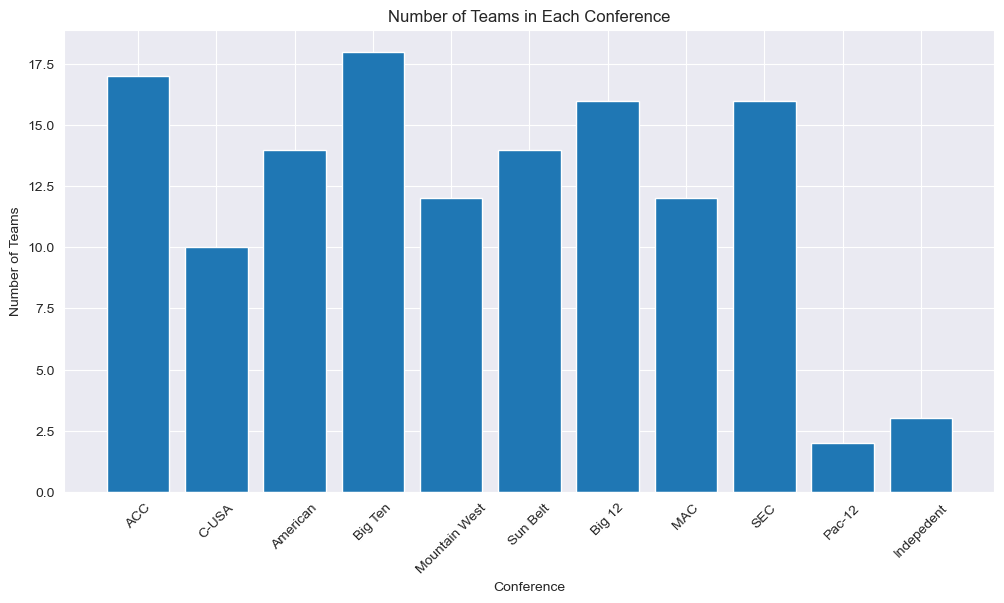

               Number of Teams
Big Ten                     18
ACC                         17
Big 12                      16
SEC                         16
American                    14
Sun Belt                    14
Mountain West               12
MAC                         12
C-USA                       10
Indepedent                   3
Pac-12                       2


In [250]:
# Create a graph showing the number of teams in each conference

# List the conferences
conferences = [acc, cUSA, american, big10, mountainWest, sunBelt, big12, mac, sec, pac12, independent]
conference_names = ['ACC', 'C-USA', 'American', 'Big Ten', 'Mountain West', 'Sun Belt', 'Big 12', 'MAC', 'SEC', 'Pac-12', 'Indepedent']

# Create a list of the number of teams in each conference
conference_teams = [len(acc), len(cUSA), len(american), len(big10), len(mountainWest), len(sunBelt), len(big12), len(mac), len(sec), len(pac12), len(independent)]


# Create a graph showing the number of teams in each conference
plt.figure(figsize=(12, 6))
plt.bar(conference_names, conference_teams)
plt.title('Number of Teams in Each Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.show()

# print out the number of teams in each conference and sort in descending order
# Tweak the list to make it sorted
conference_teams = pd.DataFrame(conference_teams, index=conference_names, columns=['Number of Teams'])
conference_teams = conference_teams.sort_values(by='Number of Teams', ascending=False)
print(conference_teams)

Task 2: Stadium capacity for each team
Task 3: Average stadium capacity for each conference

In [251]:
# Create a dataframe with the team and stadium capacity for every team in every conference
big10_stadiums = big10[['Team', 'Capacity']]
sec_stadiums = sec[['Team', 'Capacity']]
acc_stadiums = acc[['Team', 'Capacity']]
pac12_stadiums = pac12[['Team', 'Capacity']]
big12_stadiums = big12[['Team', 'Capacity']]
american_stadiums = american[['Team', 'Capacity']]
cUSA_stadiums = cUSA[['Team', 'Capacity']]
mountainWest_stadiums = mountainWest[['Team', 'Capacity']]
sunBelt_stadiums = sunBelt[['Team', 'Capacity']]
mac_stadiums = mac[['Team', 'Capacity']]
independent_stadiums = independent[['Team', 'Capacity']]

In [252]:
# Sort the stadiums by capacity
big10_stadiums = big10_stadiums.sort_values(by='Capacity', ascending=False)
sec_stadiums = sec_stadiums.sort_values(by='Capacity', ascending=False)
acc_stadiums = acc_stadiums.sort_values(by='Capacity', ascending=False)
pac12_stadiums = pac12_stadiums.sort_values(by='Capacity', ascending=False)
big12_stadiums = big12_stadiums.sort_values(by='Capacity', ascending=False)
american_stadiums = american_stadiums.sort_values(by='Capacity', ascending=False)
cUSA_stadiums = cUSA_stadiums.sort_values(by='Capacity', ascending=False)
mountainWest_stadiums = mountainWest_stadiums.sort_values(by='Capacity', ascending=False)
sunBelt_stadiums = sunBelt_stadiums.sort_values(by='Capacity', ascending=False) 
mac_stadiums = mac_stadiums.sort_values(by='Capacity', ascending=False)
independent_stadiums = independent_stadiums.sort_values(by='Capacity', ascending=False)

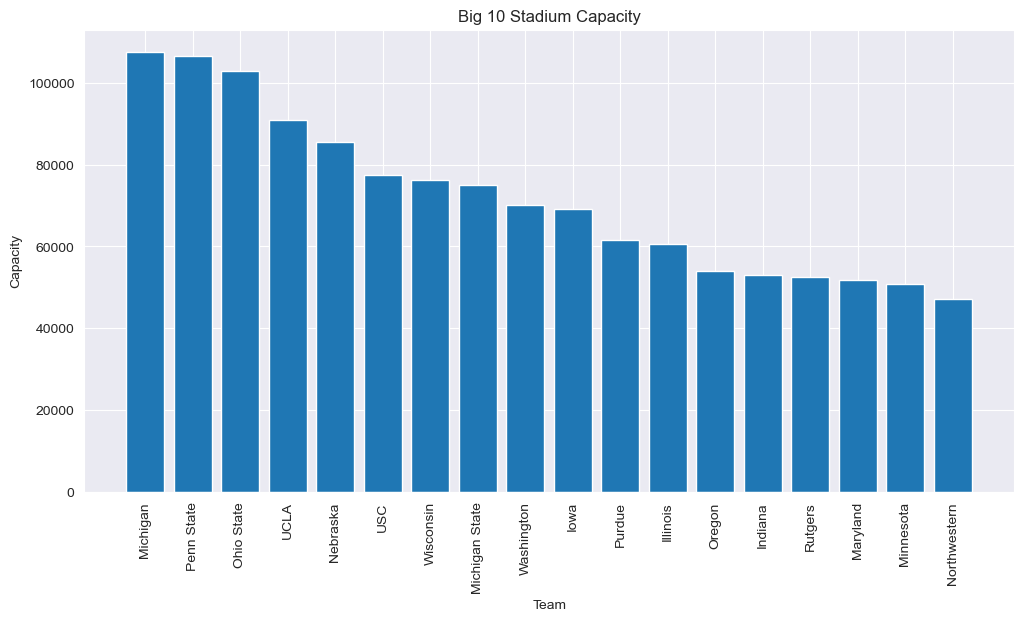

In [253]:
# craete a graph showing the stadium capacity for the big 10 conference
plt.figure(figsize=(12, 6))
plt.bar(big10_stadiums['Team'], big10_stadiums['Capacity'])
plt.title('Big 10 Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

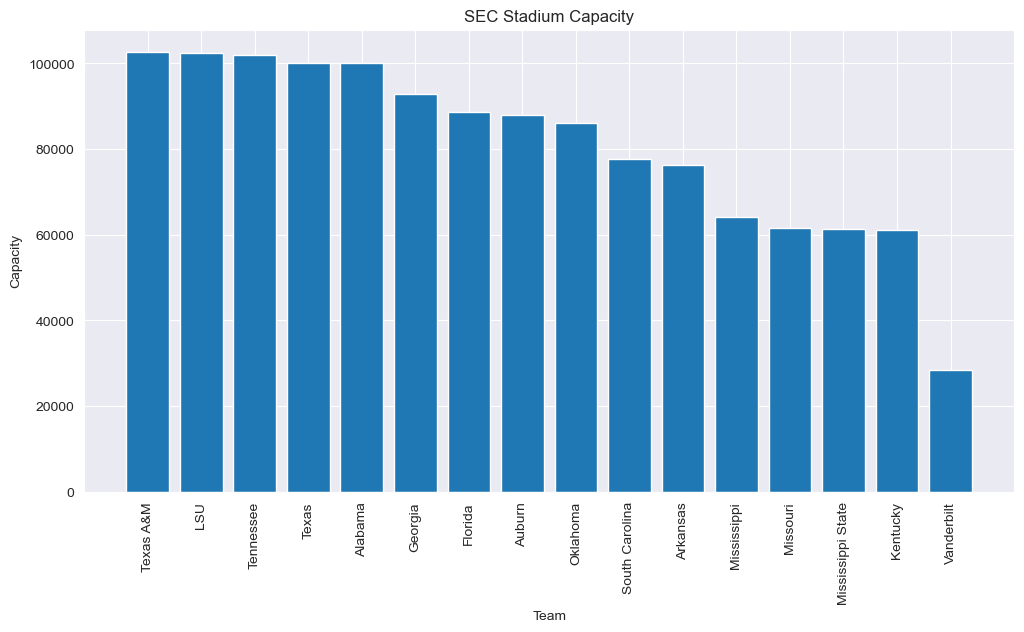

In [254]:
# SEC
plt.figure(figsize=(12, 6))
plt.bar(sec_stadiums['Team'], sec_stadiums['Capacity'])
plt.title('SEC Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

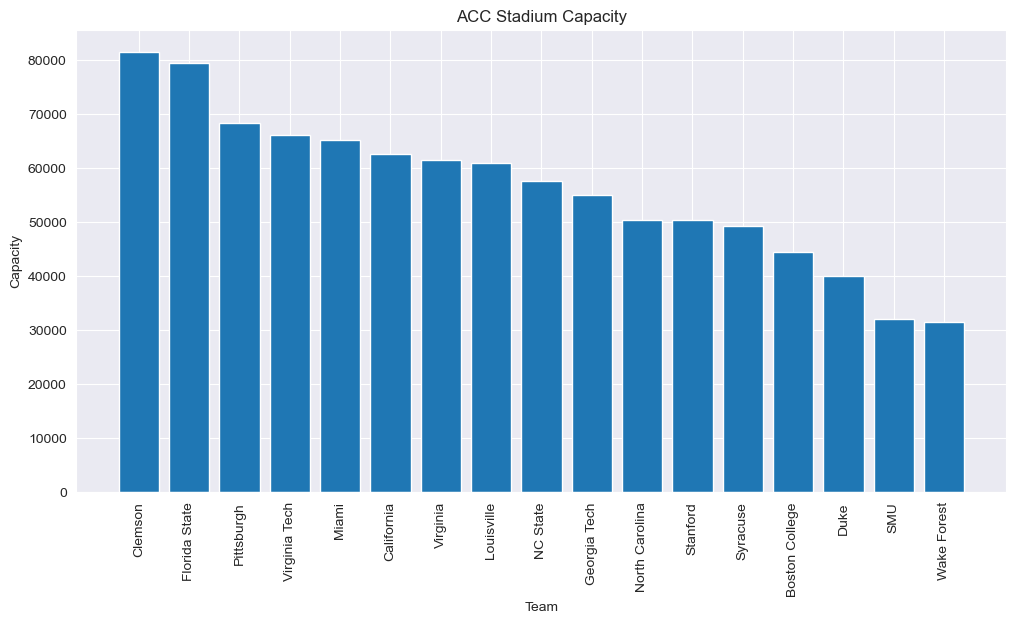

In [255]:
# ACC
plt.figure(figsize=(12, 6))
plt.bar(acc_stadiums['Team'], acc_stadiums['Capacity'])
plt.title('ACC Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

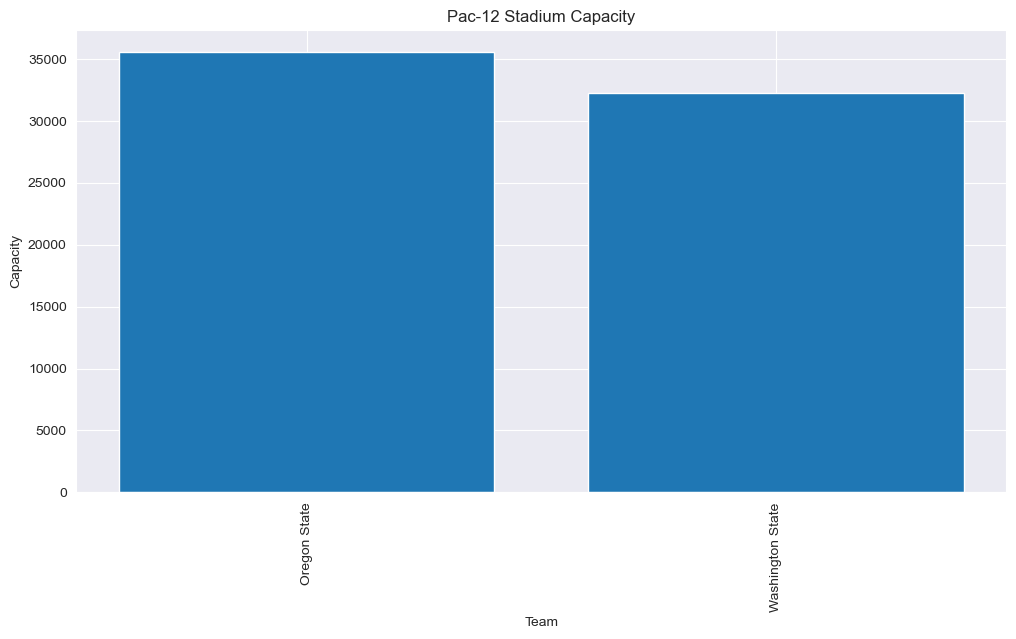

In [256]:
# Pac-12
plt.figure(figsize=(12, 6))
plt.bar(pac12_stadiums['Team'], pac12_stadiums['Capacity'])
plt.title('Pac-12 Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

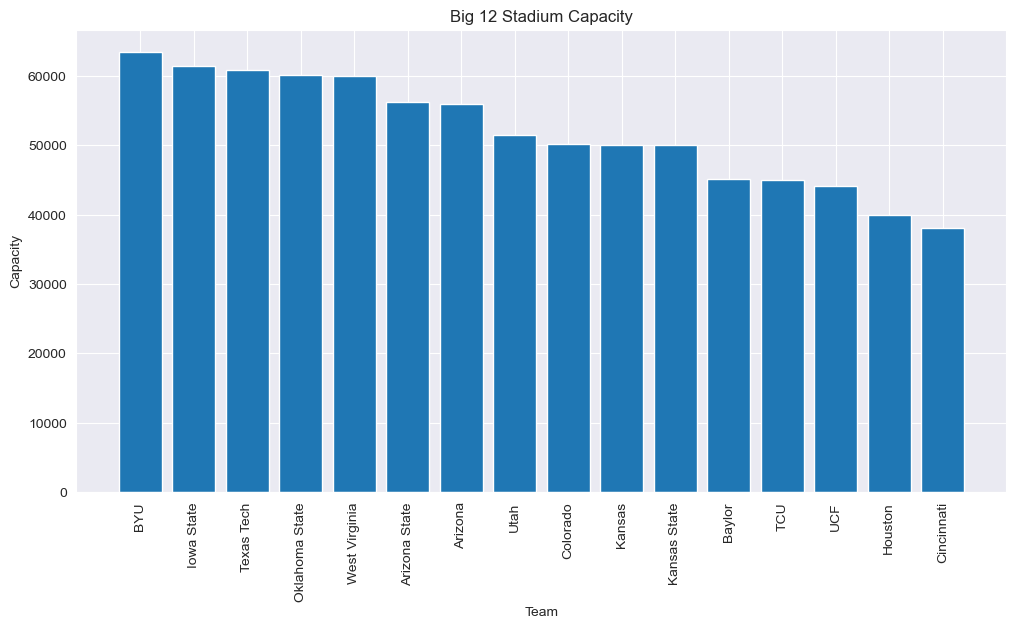

In [257]:
# Big 12
plt.figure(figsize=(12, 6))
plt.bar(big12_stadiums['Team'], big12_stadiums['Capacity'])
plt.title('Big 12 Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

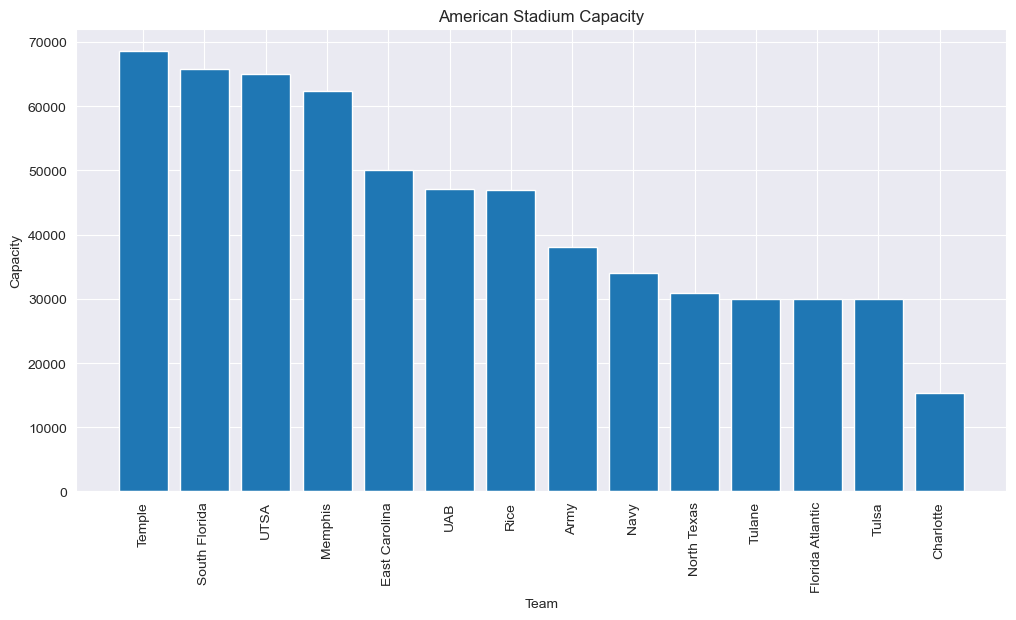

In [258]:
# American
plt.figure(figsize=(12, 6))
plt.bar(american_stadiums['Team'], american_stadiums['Capacity'])
plt.title('American Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

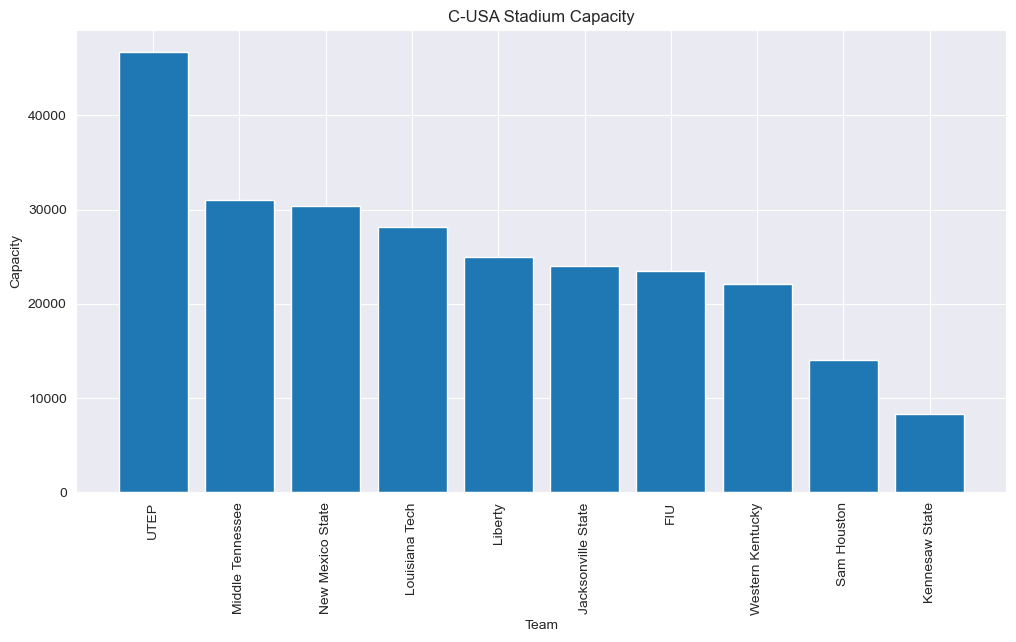

In [259]:
# C-USA
plt.figure(figsize=(12, 6))
plt.bar(cUSA_stadiums['Team'], cUSA_stadiums['Capacity'])
plt.title('C-USA Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

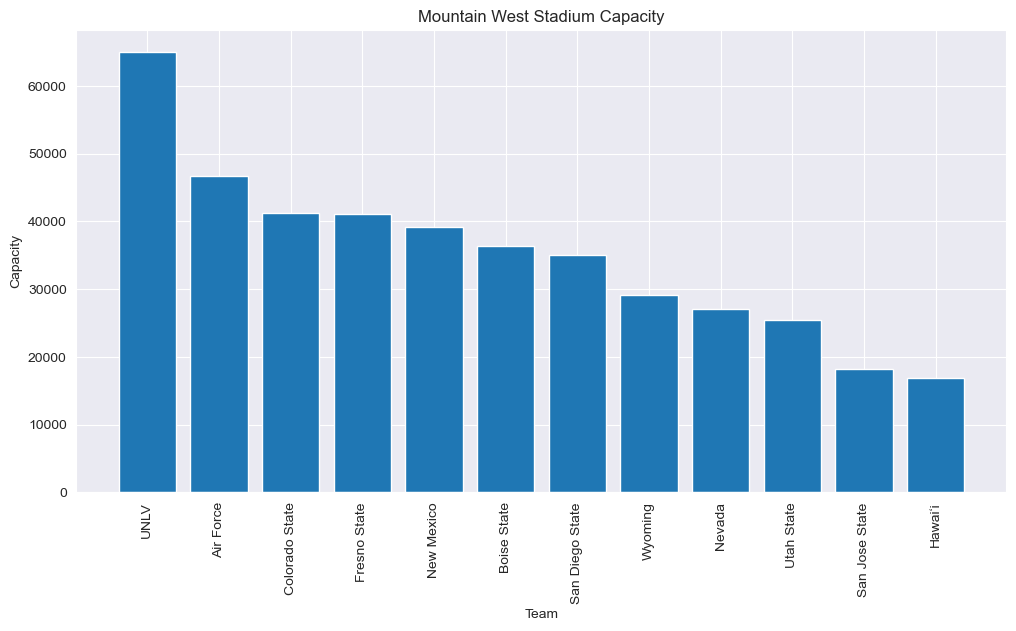

In [260]:
# Mountain West
plt.figure(figsize=(12, 6))
plt.bar(mountainWest_stadiums['Team'], mountainWest_stadiums['Capacity'])
plt.title('Mountain West Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

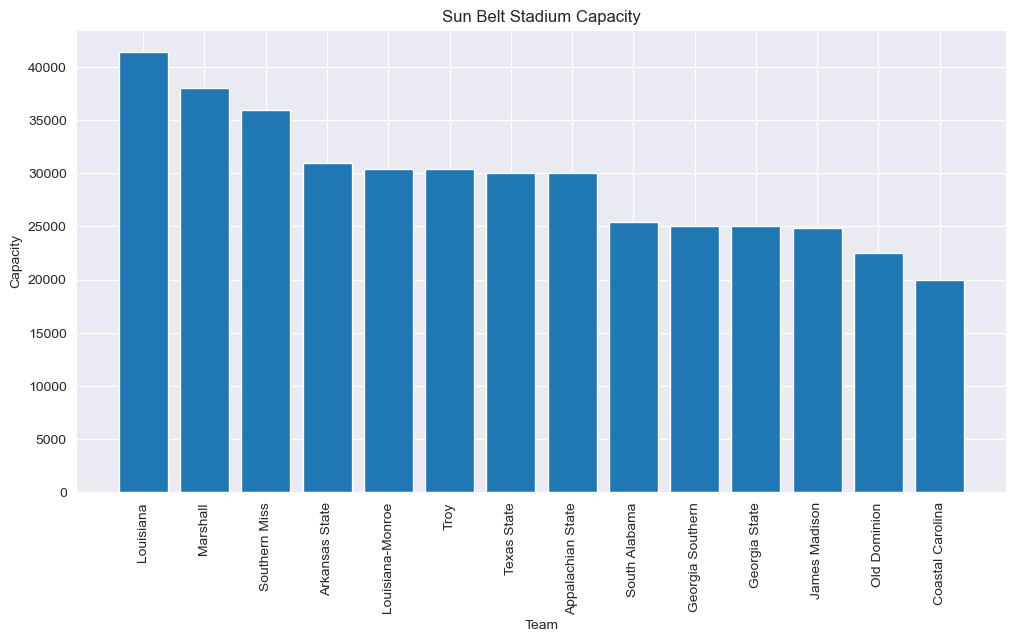

In [261]:
# Sun Belt
plt.figure(figsize=(12, 6))
plt.bar(sunBelt_stadiums['Team'], sunBelt_stadiums['Capacity'])
plt.title('Sun Belt Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

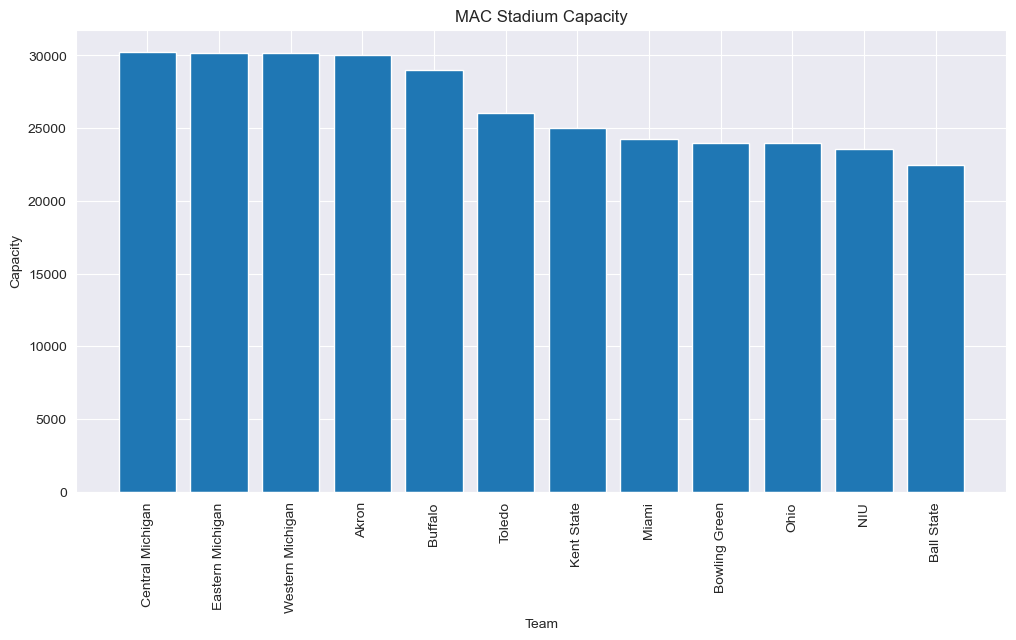

In [262]:
# MAC
plt.figure(figsize=(12, 6))
plt.bar(mac_stadiums['Team'], mac_stadiums['Capacity'])
plt.title('MAC Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

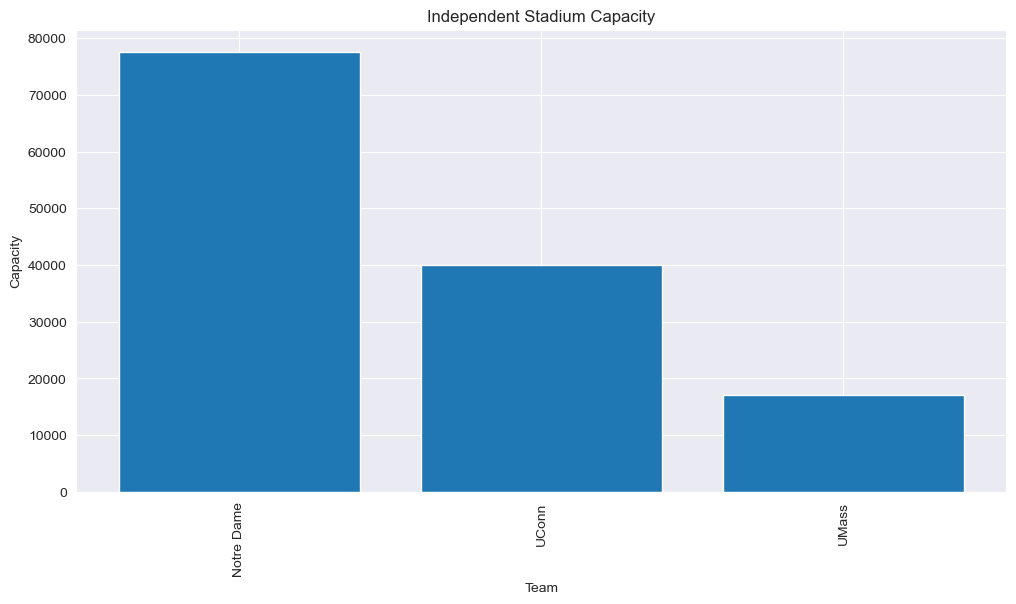

In [263]:
# Independent
plt.figure(figsize=(12, 6))
plt.bar(independent_stadiums['Team'], independent_stadiums['Capacity'])
plt.title('Independent Stadium Capacity')
plt.xlabel('Team')
plt.ylabel('Capacity')
plt.xticks(rotation=90)
plt.show()

In [264]:
# Get the average stadium capacity every conference
b10Mean = int(big10_stadiums['Capacity'].mean())
secMean = int(sec_stadiums['Capacity'].mean())
accMean = int(acc_stadiums['Capacity'].mean())
pac12Mean = int(pac12_stadiums['Capacity'].mean())
big12Mean = int(big12_stadiums['Capacity'].mean())
americanMean = int(american_stadiums['Capacity'].mean())
cUSAMean = int(cUSA_stadiums['Capacity'].mean())
mountainWestMean = int(mountainWest_stadiums['Capacity'].mean())
sunBeltMean = int(sunBelt_stadiums['Capacity'].mean())
macMean = int(mac_stadiums['Capacity'].mean())
independentMean = int(independent_stadiums['Capacity'].mean())

# Print the average stadium capacity for each conference
print('Big 10 Average Stadium Capacity:', b10Mean)
print('SEC Average Stadium Capacity:', secMean)
print('ACC Average Stadium Capacity:', accMean)
print('Pac-12 Average Stadium Capacity:', pac12Mean)
print('Big 12 Average Stadium Capacity:', big12Mean)
print('American Average Stadium Capacity:', americanMean)
print('C-USA Average Stadium Capacity:', cUSAMean)
print('Mountain West Average Stadium Capacity:', mountainWestMean)
print('Sun Belt Average Stadium Capacity:', sunBeltMean)
print('MAC Average Stadium Capacity:', macMean)
print('Independent Average Stadium Capacity:', independentMean)

Big 10 Average Stadium Capacity: 71806
SEC Average Stadium Capacity: 80805
ACC Average Stadium Capacity: 56293
Pac-12 Average Stadium Capacity: 33898
Big 12 Average Stadium Capacity: 52027
American Average Stadium Capacity: 43859
C-USA Average Stadium Capacity: 25305
Mountain West Average Stadium Capacity: 35116
Sun Belt Average Stadium Capacity: 29289
MAC Average Stadium Capacity: 26590
Independent Average Stadium Capacity: 44874


In [265]:
# sort the average stadium capacity for each conference
conference_means = pd.DataFrame([accMean, cUSAMean, americanMean, b10Mean, mountainWestMean, sunBeltMean, big12Mean, macMean, secMean, pac12Mean, independentMean], index=conference_names, columns=['Average Stadium Capacity'])
conference_means = conference_means.sort_values(by='Average Stadium Capacity', ascending=False)
print(conference_means)

               Average Stadium Capacity
SEC                               80805
Big Ten                           71806
ACC                               56293
Big 12                            52027
Indepedent                        44874
American                          43859
Mountain West                     35116
Pac-12                            33898
Sun Belt                          29289
MAC                               26590
C-USA                             25305


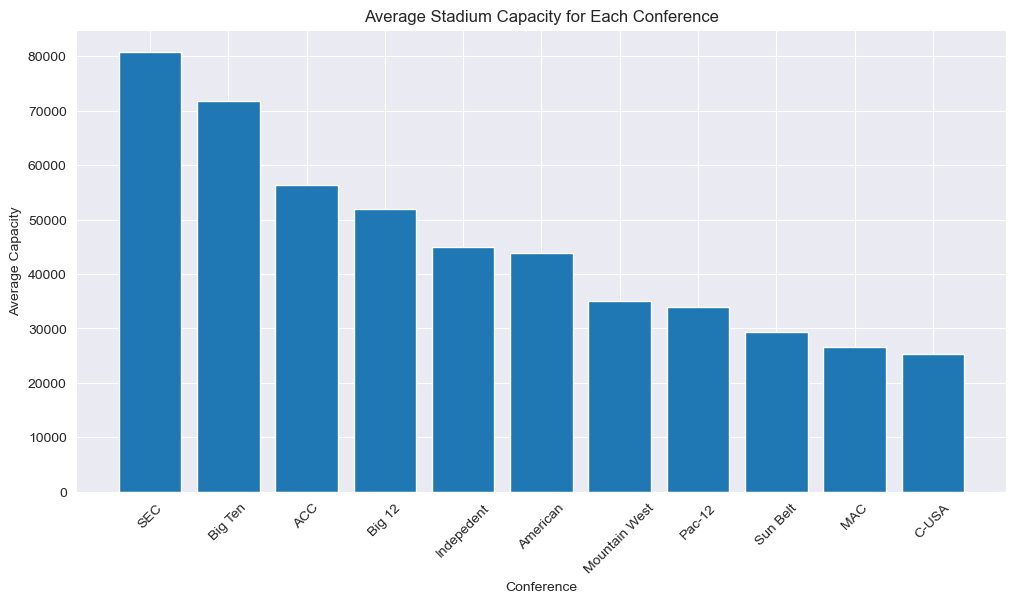

In [266]:
# Create a graph showing the average stadium capacity for each conference
plt.figure(figsize=(12, 6))
plt.bar(conference_means.index, conference_means['Average Stadium Capacity'])
plt.title('Average Stadium Capacity for Each Conference')
plt.xlabel('Conference')
plt.ylabel('Average Capacity')
plt.xticks(rotation=45)
plt.show()

Task 4: Oldest and newest stadiums
Task 5: Stadium age for teams and conferences

In [267]:
# Create a dataframe with the team and the stadium age for every team in every conference
big10_age = big10[['Team', 'Built']]
sec_age = sec[['Team', 'Built']]
acc_age = acc[['Team', 'Built']]
pac12_age = pac12[['Team', 'Built']]
big12_age = big12[['Team', 'Built']]
american_age = american[['Team', 'Built']]
cUSA_age = cUSA[['Team', 'Built']]
mountainWest_age = mountainWest[['Team', 'Built']]
sunBelt_age = sunBelt[['Team', 'Built']]
mac_age = mac[['Team', 'Built']]
independent_age = independent[['Team', 'Built']]

In [268]:
# Sort the stadiums by age
big10_age = big10_age.sort_values(by='Built', ascending=True)
sec_age = sec_age.sort_values(by='Built', ascending=True)
acc_age = acc_age.sort_values(by='Built', ascending=True)
pac12_age = pac12_age.sort_values(by='Built', ascending=True)
big12_age = big12_age.sort_values(by='Built', ascending=True)
american_age = american_age.sort_values(by='Built', ascending=True)
cUSA_age = cUSA_age.sort_values(by='Built', ascending=True)
mountainWest_age = mountainWest_age.sort_values(by='Built', ascending=True)
sunBelt_age = sunBelt_age.sort_values(by='Built', ascending=True)
mac_age = mac_age.sort_values(by='Built', ascending=True)
independent_age = independent_age.sort_values(by='Built', ascending=True)

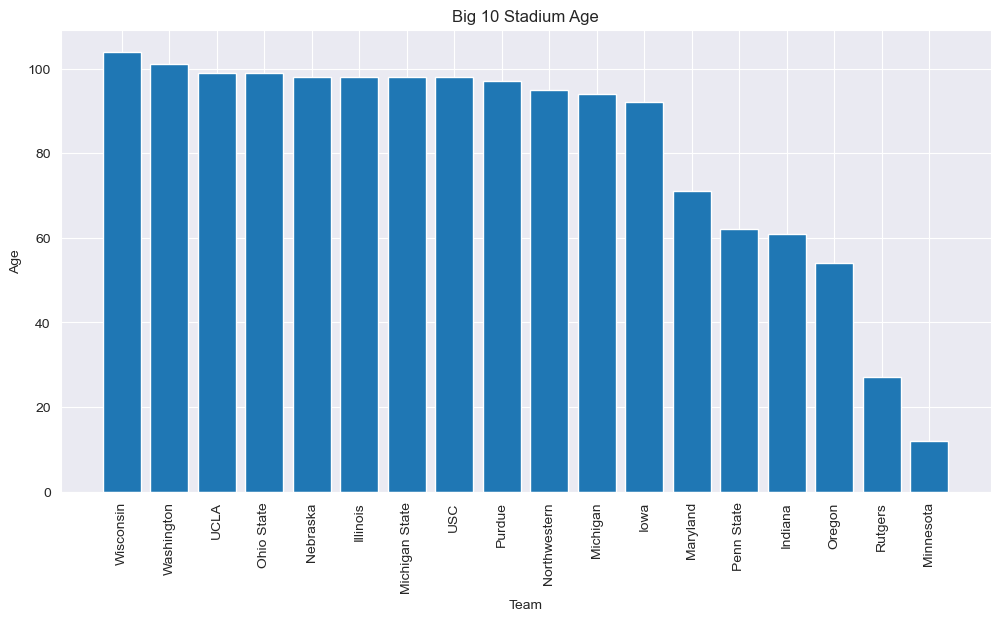

In [269]:
# Create a graph showing the stadium age for the big 10 conference
plt.figure(figsize=(12, 6))
plt.bar(big10_age['Team'], 2021 - big10_age['Built'])
plt.title('Big 10 Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

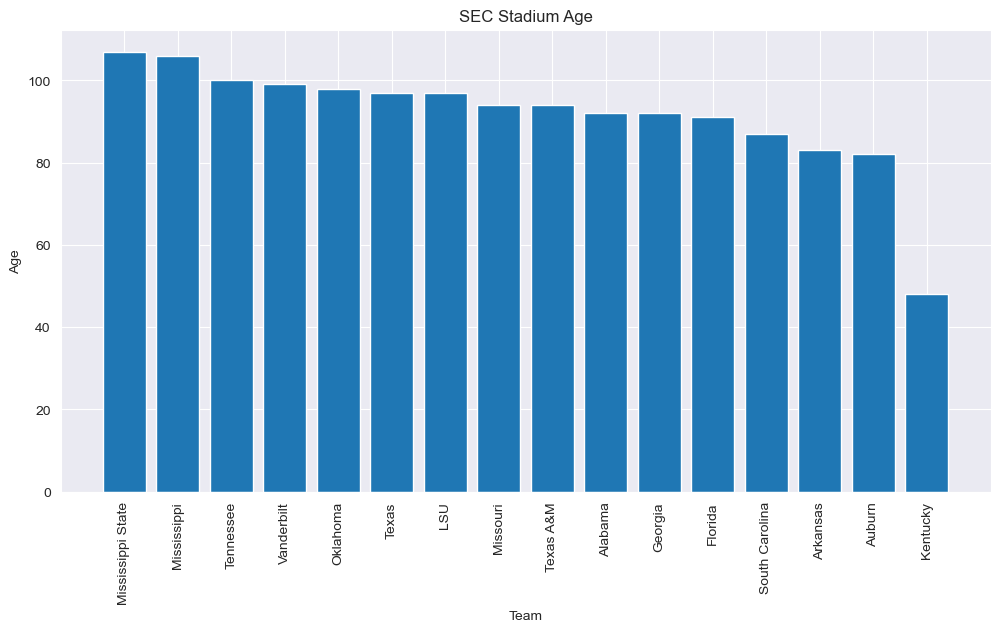

In [270]:
# SEC
plt.figure(figsize=(12, 6))
plt.bar(sec_age['Team'], 2021 - sec_age['Built'])
plt.title('SEC Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

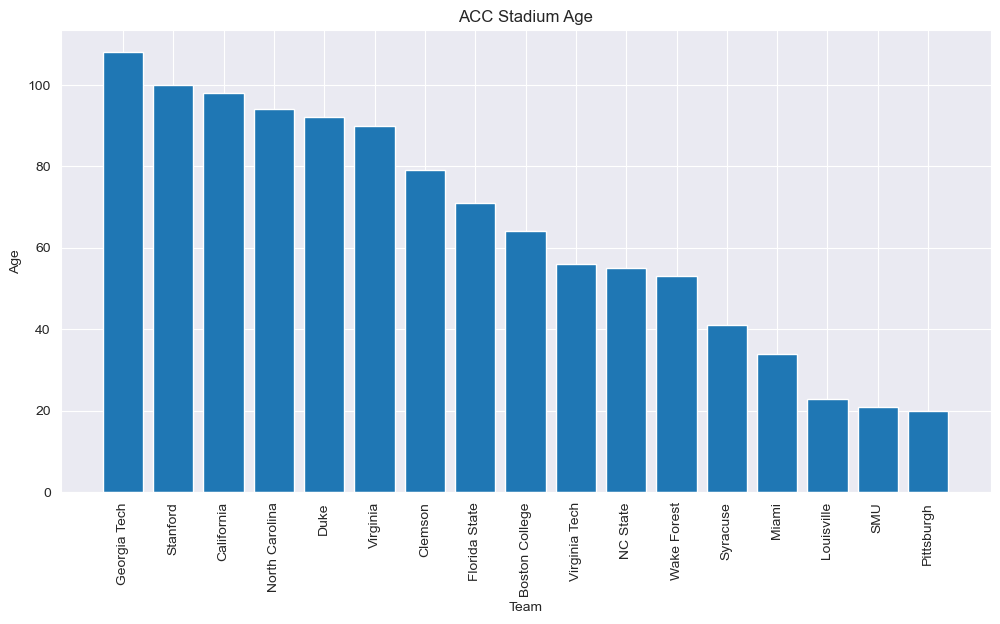

In [271]:
# ACC
plt.figure(figsize=(12, 6))
plt.bar(acc_age['Team'], 2021 - acc_age['Built'])
plt.title('ACC Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

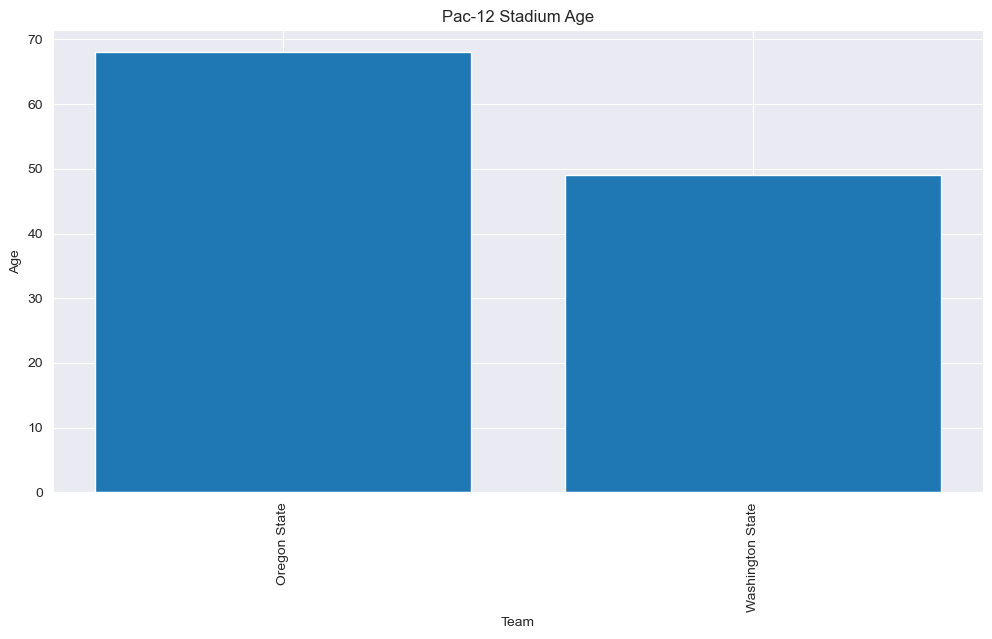

In [272]:
# Pac-12
plt.figure(figsize=(12, 6))
plt.bar(pac12_age['Team'], 2021 - pac12_age['Built'])
plt.title('Pac-12 Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

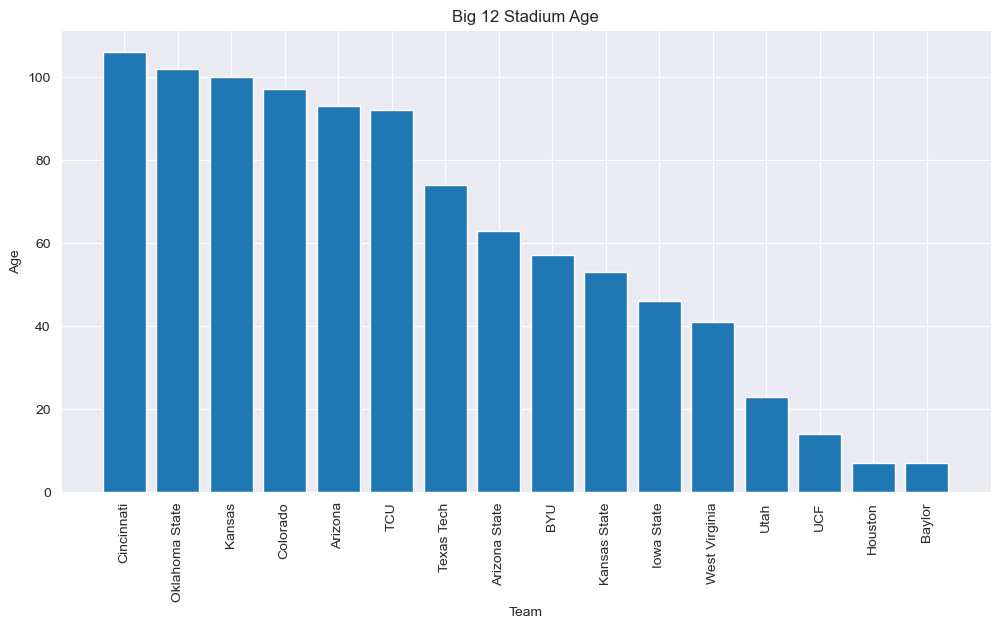

In [273]:
# Big 12
plt.figure(figsize=(12, 6))
plt.bar(big12_age['Team'], 2021 - big12_age['Built'])
plt.title('Big 12 Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

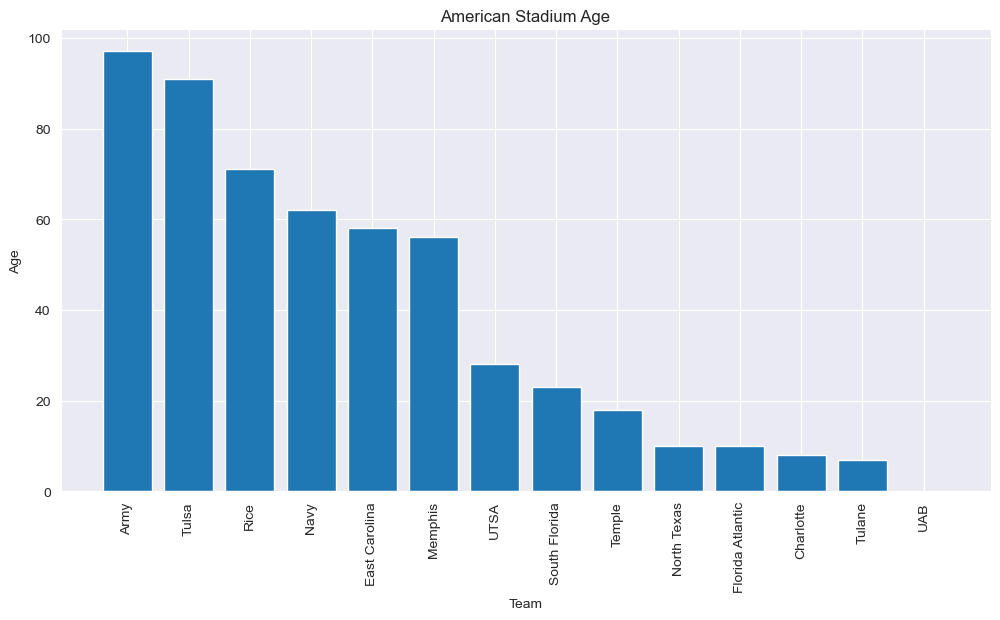

In [274]:
# American
plt.figure(figsize=(12, 6))
plt.bar(american_age['Team'], 2021 - american_age['Built'])
plt.title('American Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

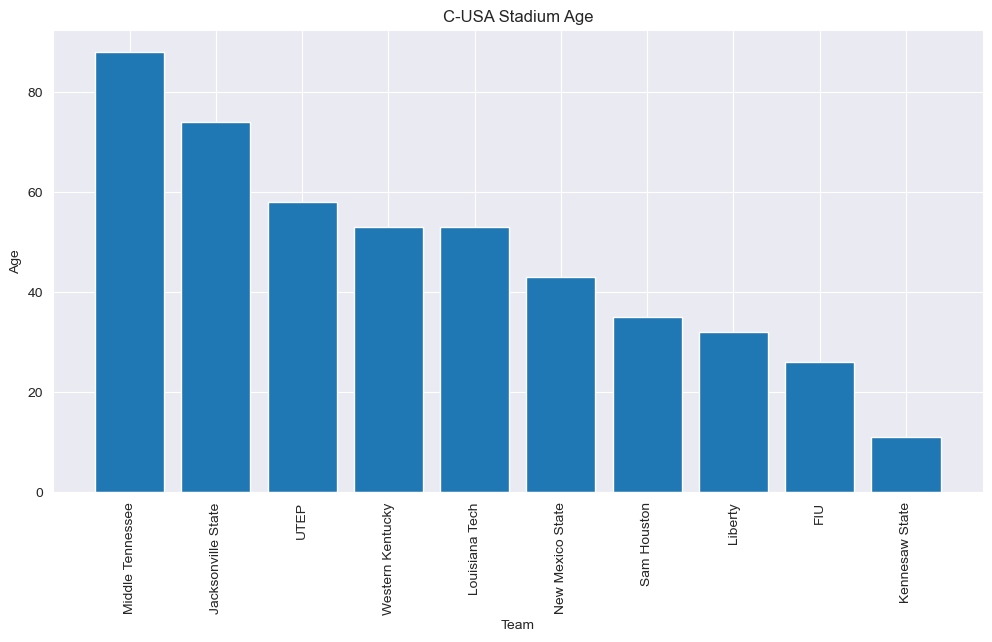

In [275]:
# C-USA
plt.figure(figsize=(12, 6))
plt.bar(cUSA_age['Team'], 2021 - cUSA_age['Built'])
plt.title('C-USA Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

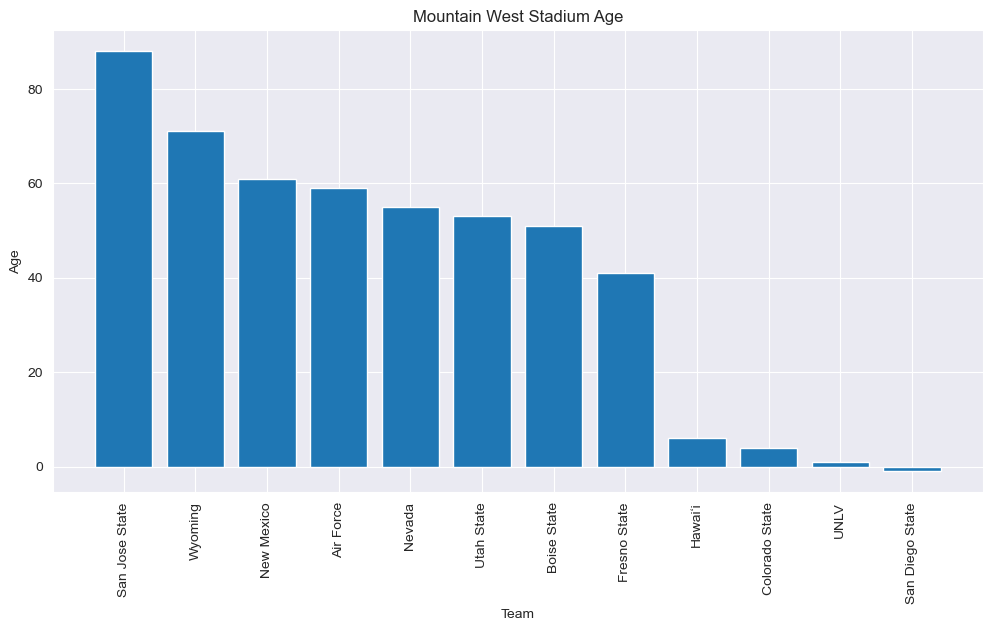

In [276]:
# Mountain West
plt.figure(figsize=(12, 6))
plt.bar(mountainWest_age['Team'], 2021 - mountainWest_age['Built'])
plt.title('Mountain West Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

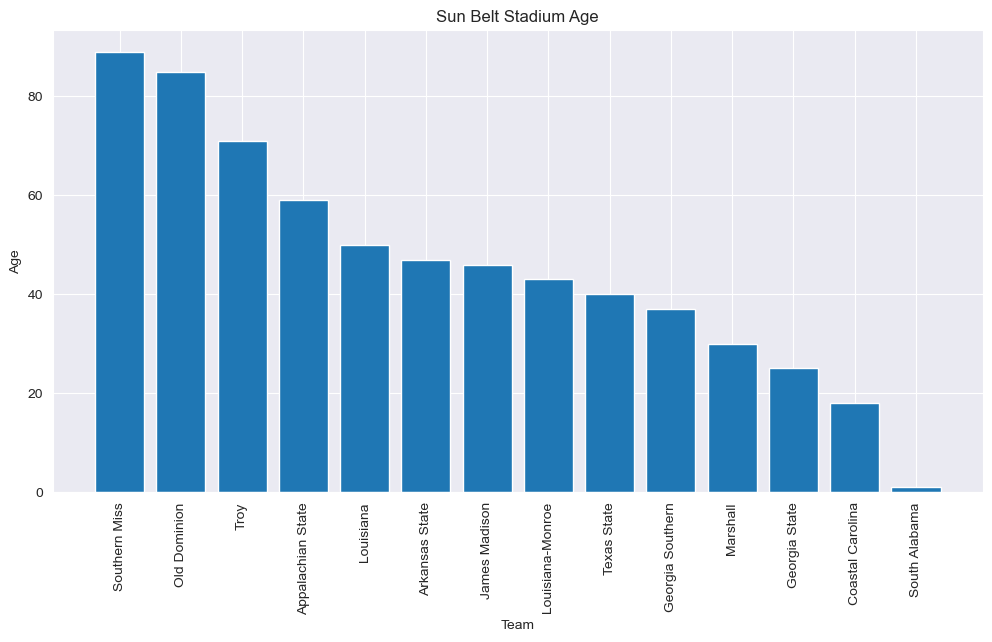

In [277]:
# Sun Belt
plt.figure(figsize=(12, 6))
plt.bar(sunBelt_age['Team'], 2021 - sunBelt_age['Built'])
plt.title('Sun Belt Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

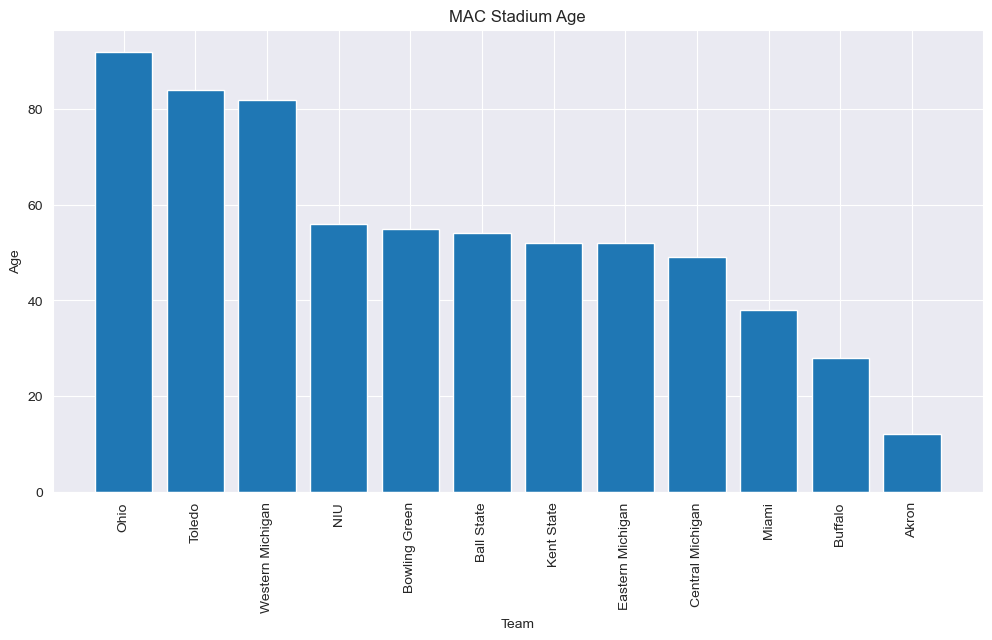

In [278]:
# MAC
plt.figure(figsize=(12, 6))
plt.bar(mac_age['Team'], 2021 - mac_age['Built'])
plt.title('MAC Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

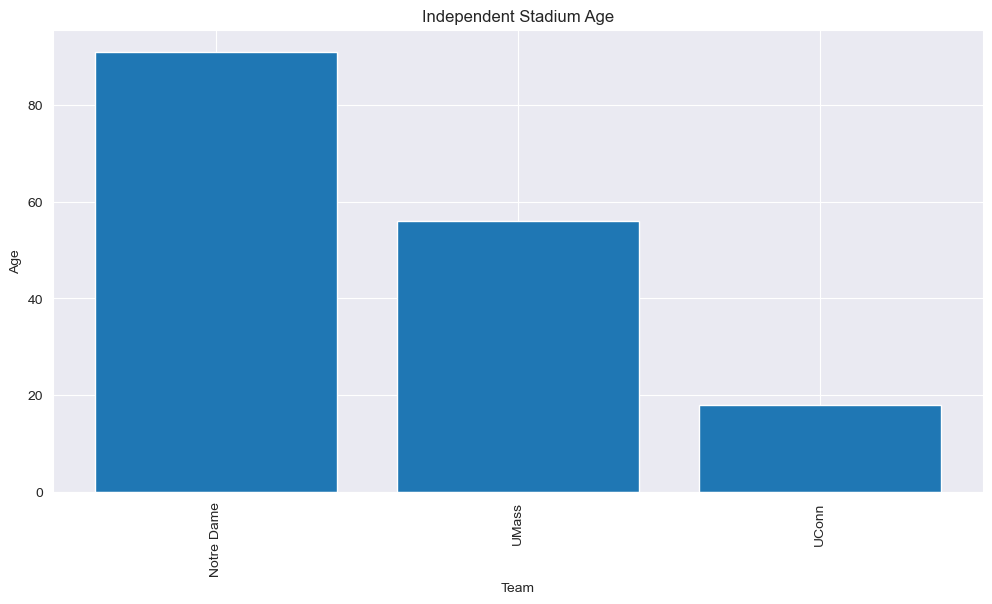

In [279]:
# Independent
plt.figure(figsize=(12, 6))
plt.bar(independent_age['Team'], 2021 - independent_age['Built'])
plt.title('Independent Stadium Age')
plt.xlabel('Team')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

In [280]:
# Get the average stadium age for every conference
b10Age = 2023 - int(big10_age['Built'].mean())
secAge = 2023 - int(sec_age['Built'].mean())
accAge = 2023 - int(acc_age['Built'].mean())
pac12Age = 2023 - int(pac12_age['Built'].mean())
big12Age = 2023 - int(big12_age['Built'].mean())
americanAge = 2023 - int(american_age['Built'].mean())
cUSAAge = 2023 - int(cUSA_age['Built'].mean())
mountainWestAge = 2023 - int(mountainWest_age['Built'].mean())
sunBeltAge = 2023 - int(sunBelt_age['Built'].mean())
macAge = 2023 - int(mac_age['Built'].mean())
independentAge = 2023 - int(independent_age['Built'].mean())

In [281]:
# Graph the average stadium age for each conference
conference_ages = pd.DataFrame([accAge, cUSAAge, americanAge, b10Age, mountainWestAge, sunBeltAge, big12Age, macAge, secAge, pac12Age, independentAge], index=conference_names, columns=['Average Stadium Age'])
conference_ages = conference_ages.sort_values(by='Average Stadium Age', ascending=False)
print(conference_ages)

               Average Stadium Age
SEC                             94
Big Ten                         84
ACC                             67
Big 12                          63
Pac-12                          61
MAC                             57
Indepedent                      57
C-USA                           50
Sun Belt                        48
Mountain West                   43
American                        41


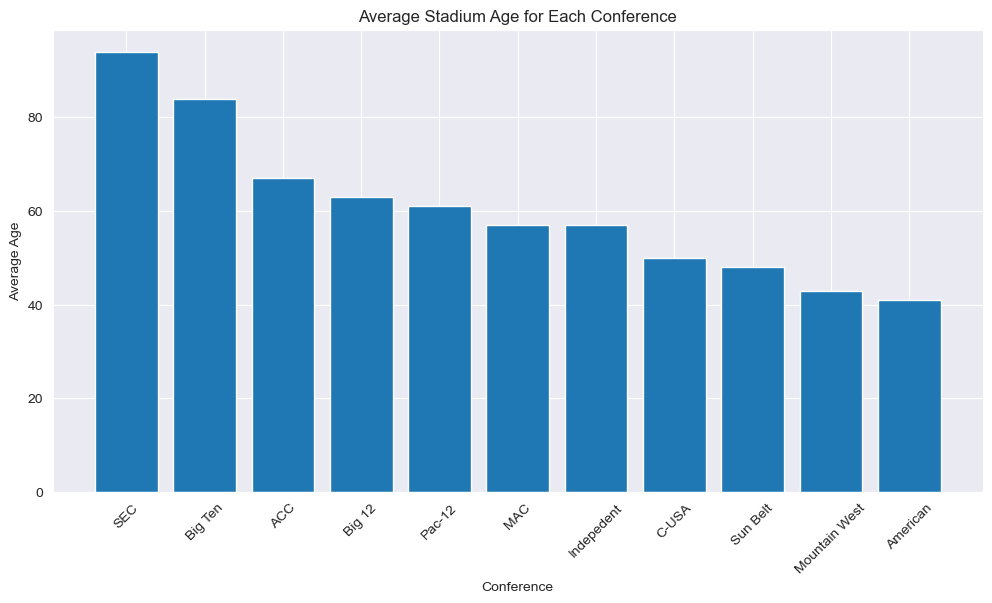

In [282]:
# Create a graph showing the average stadium age for each conference
plt.figure(figsize=(12, 6))
plt.bar(conference_ages.index, conference_ages['Average Stadium Age'])
plt.title('Average Stadium Age for Each Conference')
plt.xlabel('Conference')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

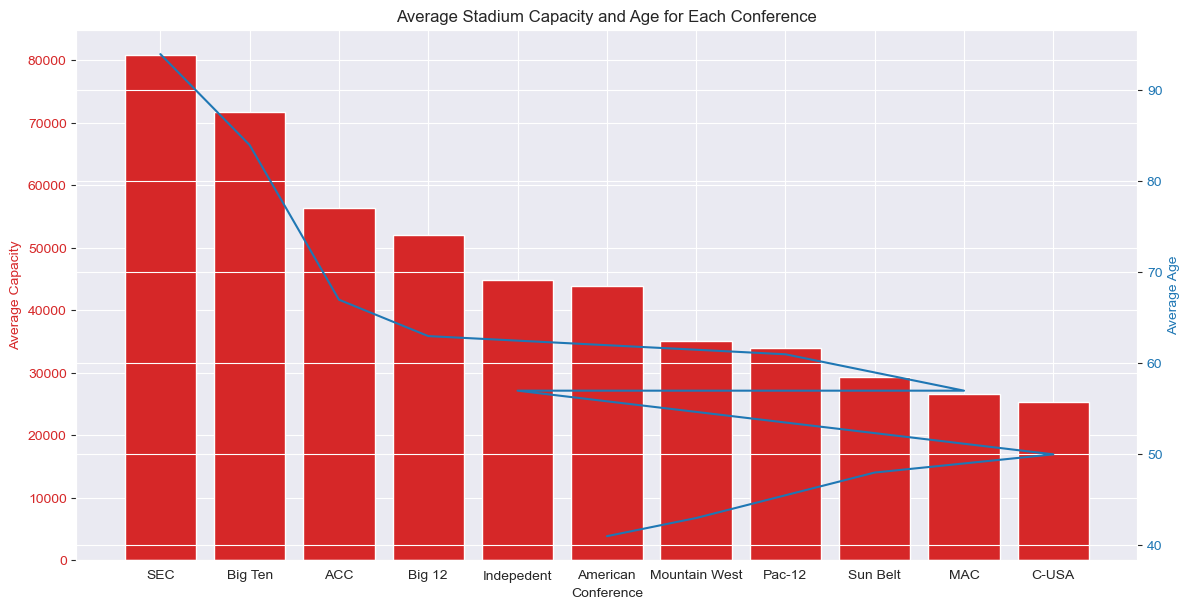

In [283]:
# Overlap this graph with the average stadium capacity for each conference
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Conference')
ax1.set_ylabel('Average Capacity', color=color)
ax1.bar(conference_means.index, conference_means['Average Stadium Capacity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Age', color=color)
ax2.plot(conference_ages.index, conference_ages['Average Stadium Age'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Stadium Capacity and Age for Each Conference')
plt.xticks(rotation=45)
plt.show()

## Remaining Tasks
- The stadium surfaces for the oldest and newest stadiums

In [284]:
# Get the 5 oldest and 5 newest stadiums
oldest = df.sort_values(by='Built', ascending=True).head(25)
newest = df.sort_values(by='Built', ascending=False).head(25)
print(oldest)
print(newest)

                                               Stadium            City State  \
19                 Bobby Dodd Stadium at Hyundai Field         Atlanta    GA   
39                   Davis Wade Stadium at Scott Field      Starkville    MS   
128    Vaught–Hemingway Stadium at Hollingsworth Field          Oxford    MS   
94                                     Nippert Stadium      Cincinnati    OH   
29                                Camp Randall Stadium         Madison    WI   
20                               Boone Pickens Stadium      Stillwater    OK   
3               Alaska Airlines Field at Husky Stadium         Seattle    WA   
119                                   Stanford Stadium        Stanford    CA   
93                                     Neyland Stadium       Knoxville    TN   
38                 David Booth Kansas Memorial Stadium        Lawrence    KS   
106                                  Rose Bowl Stadium        Pasadena    CA   
96                                      

In [285]:
oldest_surface = oldest['Surface'].value_counts()
newest_surface = newest['Surface'].value_counts()
print(oldest_surface)
print(newest_surface)


Surface
Grass                                                    11
FieldTurf                                                 8
Legion NXT turf                                           1
Prescription Athletic Turf (Tifway 419 Bermuda Grass)     1
UBU Sports Speed M6-M                                     1
Astroturf 3D Decade                                       1
Shaw Sports Legion 46                                     1
Field Turf                                                1
Name: count, dtype: int64
Surface
Grass                                              5
FieldTurf                                          5
Matrix Artificial Turf                             2
Artificial                                         1
Shaw Sports Artificial Turf                        1
Artificial turf                                    1
Act Global UBU Speed Series S5-M Synthetic Turf    1
Act Global UBU Speed Series S5-M                   1
PowerBlade Artificial Turf                         1
P

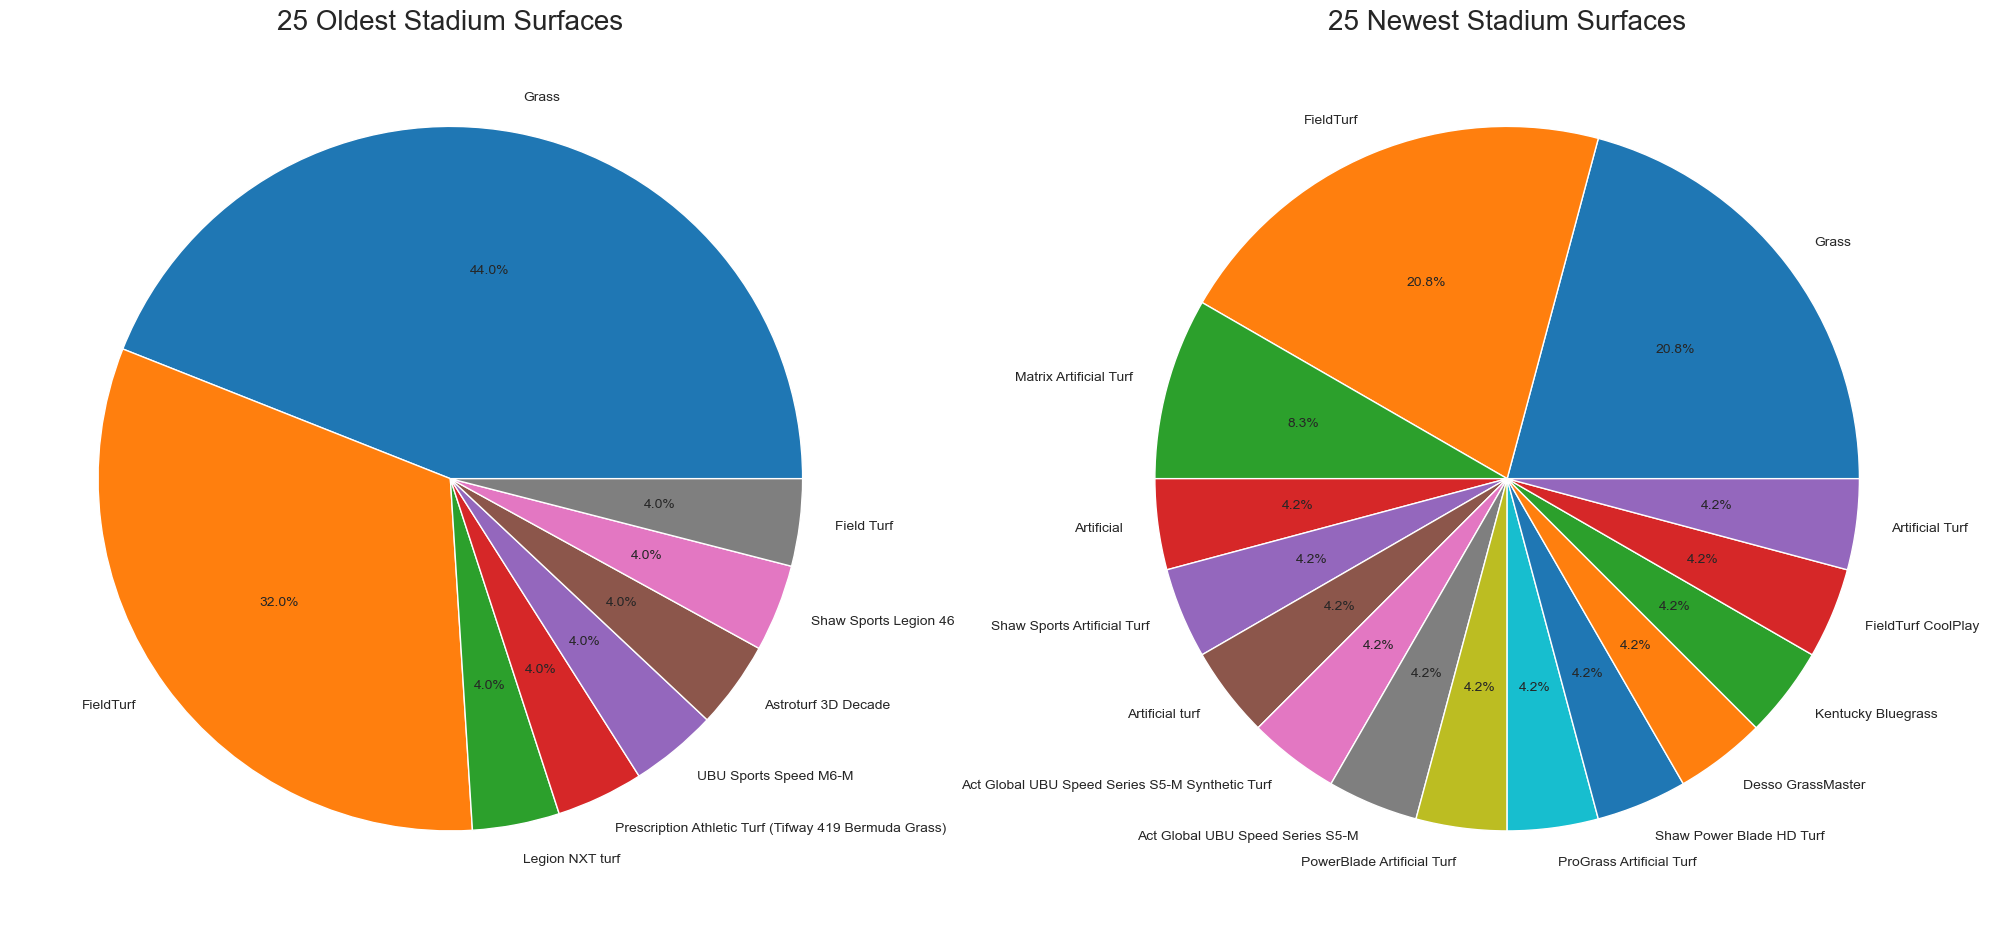

In [286]:
# Create a graph showing the stadium surfaces for the oldest and newest stadiums
fig, ax = plt.subplots(1, 2, figsize=(25, 15))
ax[0].pie(oldest_surface, labels=oldest_surface.index, autopct='%1.1f%%')
ax[0].set_title('25 Oldest Stadium Surfaces', fontsize=20)
ax[1].pie(newest_surface, labels=newest_surface.index, autopct='%1.1f%%')
ax[1].set_title('25 Newest Stadium Surfaces', fontsize=20)
plt.show()

This is a little harder to see so I will create a new dataframe with the columns labeled as just grass, turf, and other

In [287]:
# Create a dataframe with the columns we need
model_df = df[['Capacity', 'Built', 'Surface']]
model_df.head()

,Capacity,Built,Surface
0,68400.0,2001.0,Grass
1,30343.0,1978.0,S5-M Synthetic Turf
2,65000.0,1993.0,SportField
3,70083.0,1920.0,FieldTurf
4,36387.0,1970.0,FieldTurf


In [288]:
# Create a dictionary to change the surface to a number
print(model_df['Surface'].unique())

['Grass' 'S5-M Synthetic Turf' 'SportField' 'FieldTurf'
 'FieldTurf Vertex Prestige with CoolPlay[6]' 'AstroTurf'
 'PowerBlade Artificial Turf' 'Tifton 419 Hybrid Bermuda'
 'Act Global UBU Speed Series S5-M' 'Synthetic Turf' 'Field Turf'
 'Legion NXT turf' 'Astroturf 3D Decade' 'Real Grass Pro Artificial Turf'
 'Latitude 36 Bermuda Grass' 'Shaw Power Blade HD Turf' 'ProGrass'
 'Shaw Sports Momentum Turf' 'ProGreen' 'Artificial Turf'
 'Artificial turf' 'Prescription Athletic Turf (Tifway 419 Bermuda Grass)'
 'PowerBlade HP' nan 'Bermuda Grass' 'Platinum TE Paspalum'
 'ProGrass Artificial Turf' 'FieldTurf Duraspine Pro'
 'Act Global UBU Speed Series S5-M Synthetic Turf'
 'AstroTurf GameDay Grass 3D' 'Desso GrassMaster' 'Matrix Artificial Turf'
 'FieldTurf Revolution 360' 'AstroTurf GameDay Grass 3D60 Extreme'
 'FieldTurf Duraspine' 'FieldTurf Revolution' 'UBU Sports Speed M6-M'
 'Kentucky Bluegrass' 'Artificial' 'AstroTurf 3D60H Synthetic Turf'
 'FieldTurf CoolPlay' 'Shaw Sports Artifici

In [289]:
model_df.info()
# Make sure Surface is a string
model_df['Surface'] = model_df['Surface'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Capacity  134 non-null    float64
 1   Built     134 non-null    float64
 2   Surface   133 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [290]:
def categorize_surface(surface):
    if 'turf' in surface.lower() or 'fieldturf' in surface.lower() or 'astroturf' in surface.lower():
        return 'turf'
    elif 'grass' in surface.lower():
        return 'grass'
    else:
        return 'other'

# Apply the function to create a new column
df['surface_category'] = model_df['Surface'].apply(categorize_surface)

df['surface_category'].unique()

array(['grass', 'turf', 'other'], dtype=object)

In [291]:
# Get counts for each surface
print(df['surface_category'].value_counts())

surface_category
turf     86
grass    38
other    10
Name: count, dtype: int64


In [292]:
oldest = df.sort_values(by='Built', ascending=True).head(25)
newest = df.sort_values(by='Built', ascending=False).head(25)
print(oldest)
print(newest)

                                               Stadium            City State  \
19                 Bobby Dodd Stadium at Hyundai Field         Atlanta    GA   
39                   Davis Wade Stadium at Scott Field      Starkville    MS   
128    Vaught–Hemingway Stadium at Hollingsworth Field          Oxford    MS   
94                                     Nippert Stadium      Cincinnati    OH   
29                                Camp Randall Stadium         Madison    WI   
20                               Boone Pickens Stadium      Stillwater    OK   
3               Alaska Airlines Field at Husky Stadium         Seattle    WA   
119                                   Stanford Stadium        Stanford    CA   
93                                     Neyland Stadium       Knoxville    TN   
38                 David Booth Kansas Memorial Stadium        Lawrence    KS   
106                                  Rose Bowl Stadium        Pasadena    CA   
96                                      

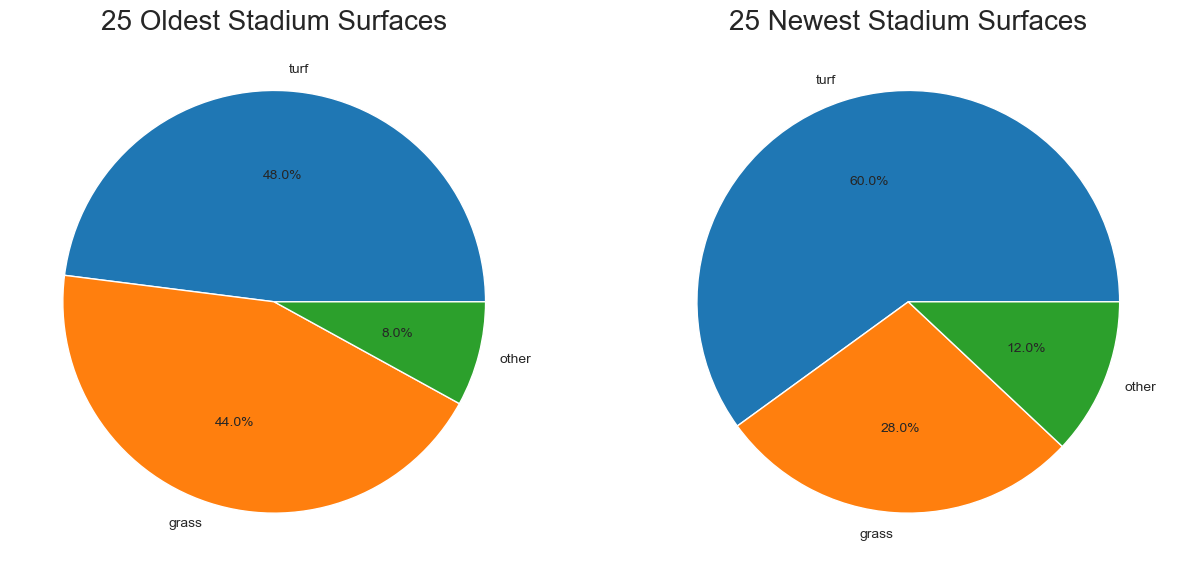

In [293]:
# Create a graph showing the stadium surfaces for the oldest and newest stadiums
oldest_surface = oldest['surface_category'].value_counts()
newest_surface = newest['surface_category'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].pie(oldest_surface, labels=oldest_surface.index, autopct='%1.1f%%')
ax[0].set_title('25 Oldest Stadium Surfaces', fontsize=20)
ax[1].pie(newest_surface, labels=newest_surface.index, autopct='%1.1f%%')
ax[1].set_title('25 Newest Stadium Surfaces', fontsize=20)
plt.show()

We can see that the oldest stadiums are mostly grass and the newest stadiums are mostly turf

# Create a model to do predictions
- Predict the stadium capacity based on the year built and the conference
- Predict the stadium capacity based on the year built and the surface

In [294]:
# Create a model to predict the stadium capacity based on the year built and the conference

In [295]:
# Create a dataframe with the columns we need
model_df = df[['Capacity', 'Built', 'Conference']]
model_df.head()

,Capacity,Built,Conference
0,68400.0,2001.0,ACC
1,30343.0,1978.0,C-USA
2,65000.0,1993.0,American
3,70083.0,1920.0,Big Ten
4,36387.0,1970.0,Mountain West


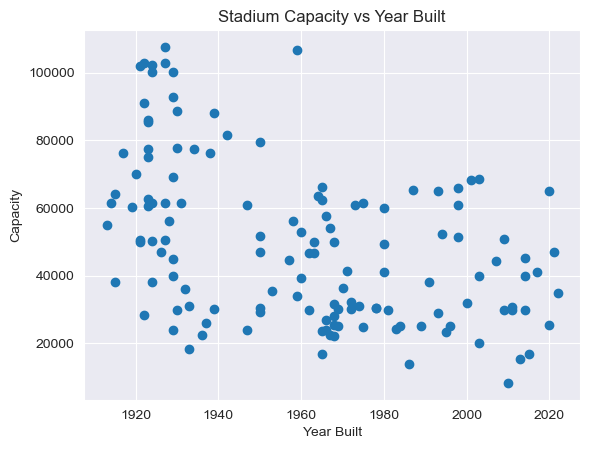

In [296]:
plt.scatter(model_df['Built'], model_df['Capacity'])
plt.title('Stadium Capacity vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Capacity')
plt.show()

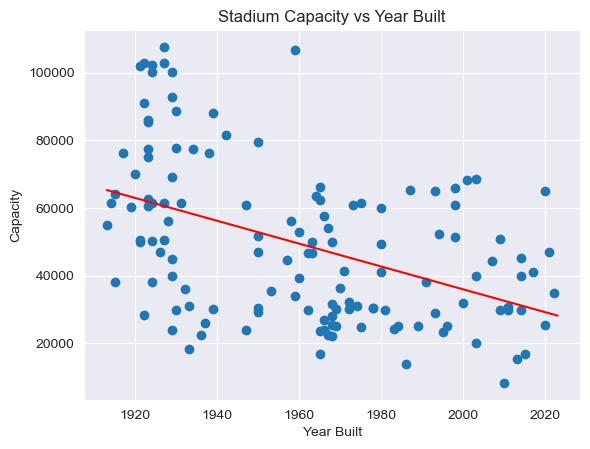

In [297]:
regressionModel = np.poly1d(np.polyfit(model_df['Built'], model_df['Capacity'], 1))

myline = np.linspace(1913, 2023, 100)

plt.scatter(model_df['Built'], model_df['Capacity'])
plt.plot(myline, regressionModel(myline), color='red')
plt.title('Stadium Capacity vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Capacity')
plt.show()

In [298]:
# Get the r squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(model_df['Built'], model_df['Capacity'])
print('R Squared:', r_value**2)

if(r_value**2 > 0.5):
    print('The model is a good fit')
else:
    print('The model is not a good fit')

R Squared: 0.20839316781823006
The model is not a good fit


Looking at the graph and the r squared value, we can see that the model is not a good fit and finding a linear regression model for this data is not the best option.


Now we will create a model to predict the stadium capacity based on the year built and the surface

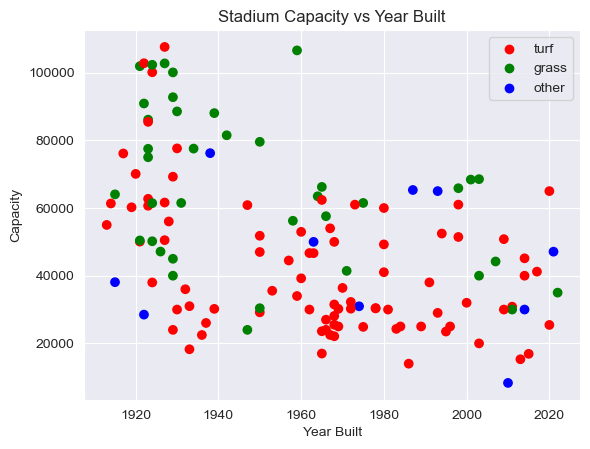

In [299]:
# Create scatter plot for the surface category. Make the surfaces different colors and scatter them together
colors = {'turf': 'red', 'grass': 'green', 'other': 'blue'}
plt.scatter(df['Built'], df['Capacity'], c=df['surface_category'].apply(lambda x: colors[x]))
plt.title('Stadium Capacity vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Capacity')
for surface in colors:
    plt.scatter([], [], c=colors[surface], label=surface)
plt.legend()
plt.show()



We can see that the newer stadiums are mostly turf and the older stadiums are mostly grass
Also the graph shows that the older stadiums have a larger capacity than the newer stadiums

In [300]:
# Make grass = 1, turf = 2, and other = 3
def categorize_surface(surface):
    if 'turf' in surface.lower() or 'fieldturf' in surface.lower() or 'astroturf' in surface.lower():
        return 2
    elif 'grass' in surface.lower():
        return 1
    else:
        return 3

# Apply the function to create a new column
df['surface_number'] = df['surface_category'].apply(categorize_surface)

print(df['surface_number'].value_counts())

surface_number
2    86
1    38
3    10
Name: count, dtype: int64


In [301]:
# Create a model to predict the stadium capacity based on the year built and the surface

# Split the data into the independent and dependent variables
X = df[['Built', 'surface_number']]
y = df['Capacity']

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the r squared value
print('R Squared:', model.score(X_test, y_test))

# Get the mean squared error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Print the equation
print('Equation: y =', model.coef_[0], 'x1 +', model.coef_[1], 'x2 +', model.intercept_)

# Print the predictions
print('Predictions:', y_pred)

# Print the actual values
print('Actual:', y_test.values)

# Print the difference between the actual and predicted values
print('Difference:', y_test.values - y_pred)


R Squared: 0.3794662590398207
Mean Squared Error: 294447279.5371578
Coefficients: [  -301.34903371 -12028.05340886]
Intercept: 661847.2535312201
Equation: y = -301.3490337064615 x1 + -12028.05340886142 x2 + 661847.2535312201
Predictions: [46570.25052082 30874.19282868 50160.5309859  61310.44523304
 45338.94644659 32380.93799722 45037.59741289 44434.89934547
 16736.69618388 47723.83077685 57091.55876115 44434.89934547
 63092.63149588 70023.65927113 46544.34258142 67914.21603518
 43530.85224436 44133.55031177 37805.22060393 65503.42376553
 31175.54186239 68516.91410259 44736.24837918 62188.58439476
 56790.20972744 68516.91410259 45011.68947349]
Actual: [ 28500.  40000.  47000.  55000.  24000.  30000.  54000.  30200.  47100.
  65857.  61620.  25000.  24000.  50183.  30000.  61500.  32248.  36387.
  38019.  88043.  15314. 100077.  50000.  79560.  56029.  92746.  44206.]
Difference: [-18070.25052082   9125.80717132  -3160.5309859   -6310.44523304
 -21338.94644659  -2380.93799722   8962.4025

With these results we can see our prediction model was not very accurate. The r squared value is very low and the mean squared error is very high. This means that the model is not a good fit and the predictions are not very accurate.

# Conclusions
## Stadium Capacity
- The SEC has the highest average stadium capacity
- The Big 10 has the second highest average stadium capacity

## Stadium Age
- The SEC has the oldest stadiums
- The Mountain West has the newest stadiums

## Stadium Surfaces
- The oldest stadiums are mostly grass
- The newest stadiums are mostly turf

## Predictions
- The model to predict the stadium capacity based on the year built and the conference was not a good fit
- The model to predict the stadium capacity based on the year built and the surface was not a good fit

## Future Work
- Find a better model to predict the stadium capacity based on the year built and the conference
- Find a better model to predict the stadium capacity based on the year built and the surface

## Limitations
- The data was not great to make predictions on as much of the data was categorical and varied greatly
